This project aims to compare different machine learning algorithms such as Logistic Regression, Support Vector Machine (SVM), Random Forest, K-Nearest Neighbors (KNN), Decision Tree, Gradient Boosting, and XGBoost, focusing on their performance metrics like accuracy, precision, recall, and F1 score. The goal is to identify the best-performing algorithm for predicting whether a person has COVID or not using the provided data. 

In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import joblib

%matplotlib inline


In [245]:
df = pd.read_csv("data.csv")

In [246]:
df.head(5)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [247]:
df.columns = df.columns.str.strip()  # Removes extra spaces

In [248]:
df.shape

(5434, 21)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [250]:
df.describe().T

,count,unique,top,freq
Breathing Problem,5434,2,Yes,3620
Fever,5434,2,Yes,4273
Dry Cough,5434,2,Yes,4307
Sore throat,5434,2,Yes,3953
Running Nose,5434,2,Yes,2952
Asthma,5434,2,No,2920
Chronic Lung Disease,5434,2,No,2869
Headache,5434,2,Yes,2736
Heart Disease,5434,2,No,2911
Diabetes,5434,2,No,2846


In [251]:
missing_values = df.isnull().sum()
missing_values 


Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [252]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue',
       'Gastrointestinal', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

## Univariate analysis

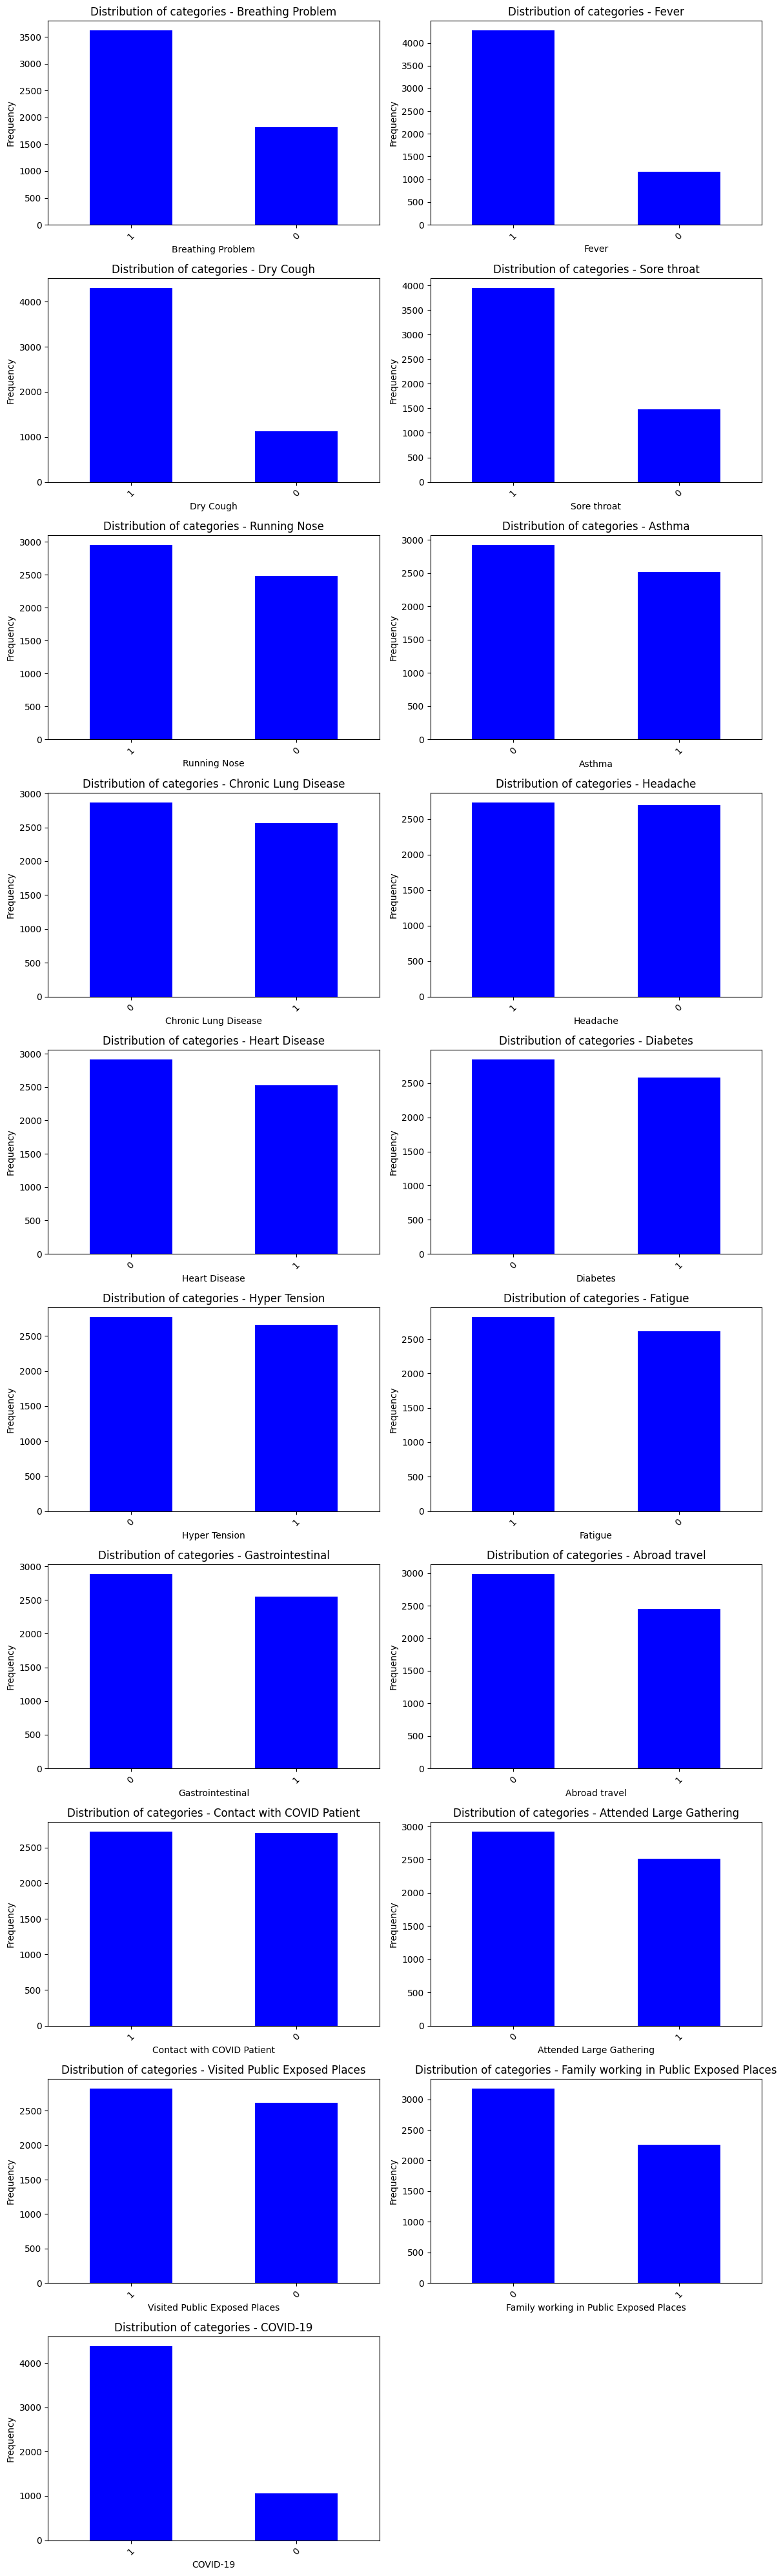

In [303]:
import pandas as pd
import matplotlib.pyplot as plt

n_columns = len(df.columns)
n_rows = (n_columns + 1) // 2

fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))

for i, col in enumerate(df.columns):
    ax = axes[i // 2, i % 2]
    df[col].value_counts().plot(kind='bar', color='blue', ax=ax)
    ax.set_title(f'Distribution of categories - {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

if n_columns % 2 != 0:
    axes[-1, 1].axis('off')

plt.tight_layout()
plt.show()


## Univariate analysis

/var/folders/dj/zks1ynnx0mlgs53ngft5mb_40000gn/T/ipykernel_86128/1913856631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

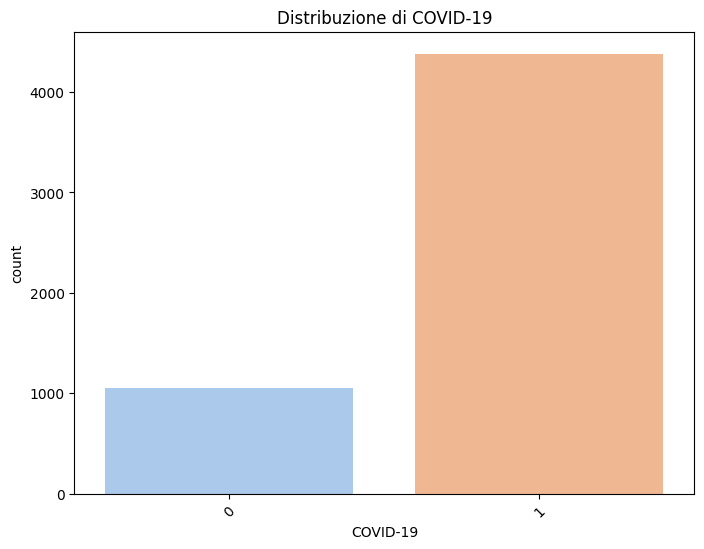

In [288]:
col = 'COVID-19'
plt.figure(figsize=(8, 6))
sns.countplot(x=col, data=df, palette='pastel')  
plt.title(f'Distribuzione di {col}')
plt.xticks(rotation=45)

In [270]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)


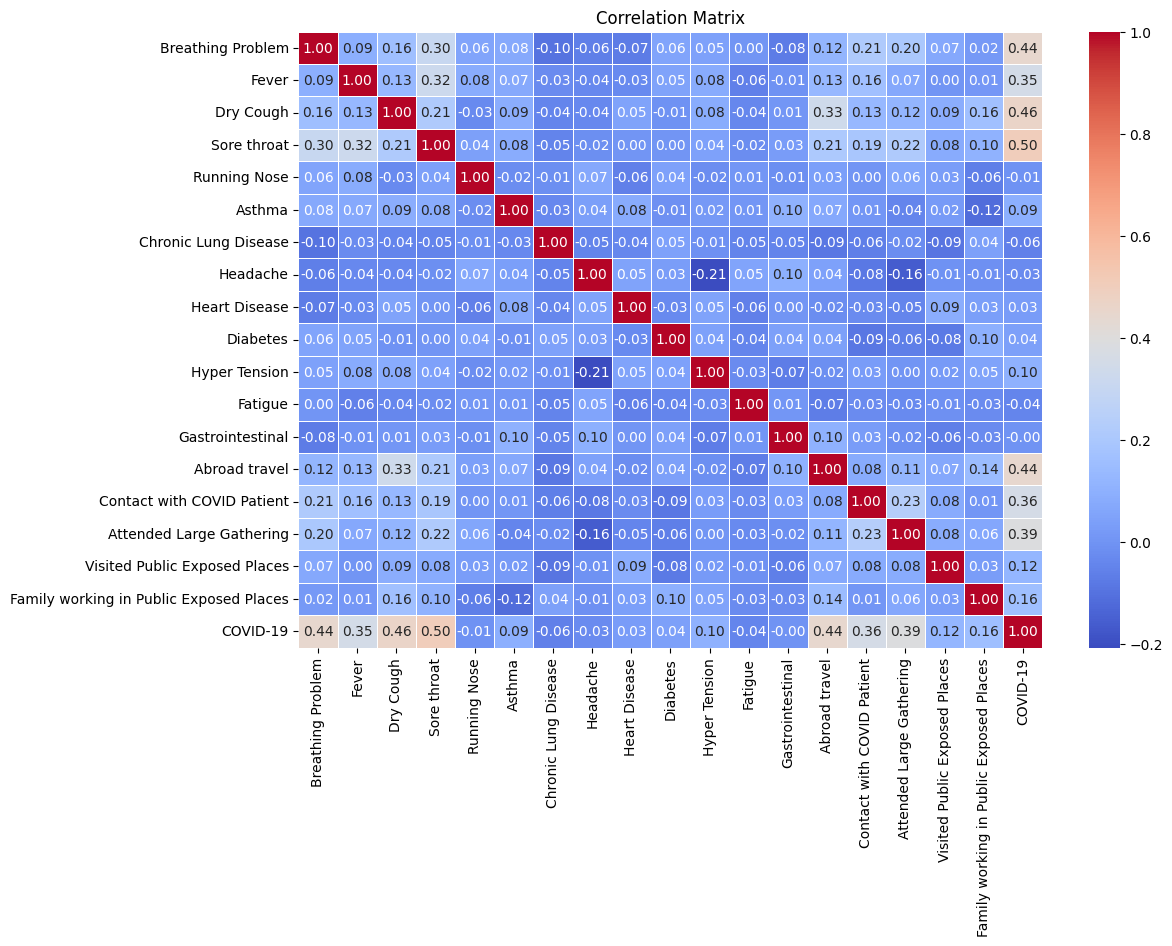

In [272]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Matrix")

plt.show()

In [257]:
unique_values_column1 = df['Wearing Masks'].unique()
unique_values_column2 = df['Sanitization from Market'].unique()

print("Unique values in column1:", unique_values_column1)
print("Unique values in column2:", unique_values_column2)


Unique values in column1: [0]
Unique values in column2: [0]


In [258]:
df = df.drop(columns=['Wearing Masks', 'Sanitization from Market'])


In [259]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue',
       'Gastrointestinal', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

Hypothesis 1: The presence of preexisting diseases increases the likelihood of developing symptoms of COVID-19


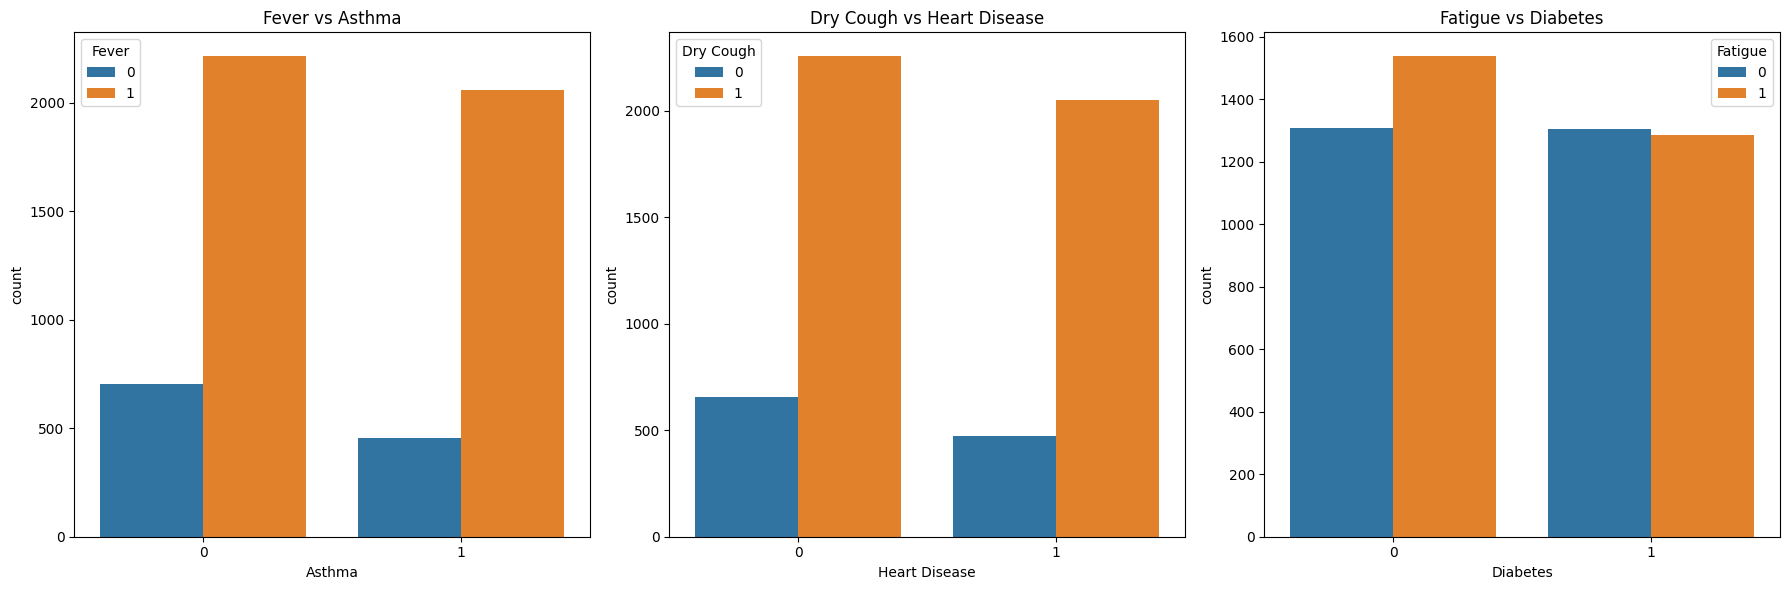

In [273]:
# Let's create a graph for each symptom (Fever, Dry Cough, Fatigue) versus the presence of pre-existing illnesses.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(x='Asthma', hue='Fever', data=df, ax=axes[0])
axes[0].set_title('Fever vs Asthma')

sns.countplot(x='Heart Disease', hue='Dry Cough', data=df, ax=axes[1])
axes[1].set_title('Dry Cough vs Heart Disease')

sns.countplot(x='Diabetes', hue='Fatigue', data=df, ax=axes[2])
axes[2].set_title('Fatigue vs Diabetes')

plt.tight_layout()
plt.show()

In [274]:
print(df.columns)


Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue',
       'Gastrointestinal', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')


Hypothesis 2: People who travel abroad or have been in contact with a COVID-positive patient are more likely to contract COVID-19


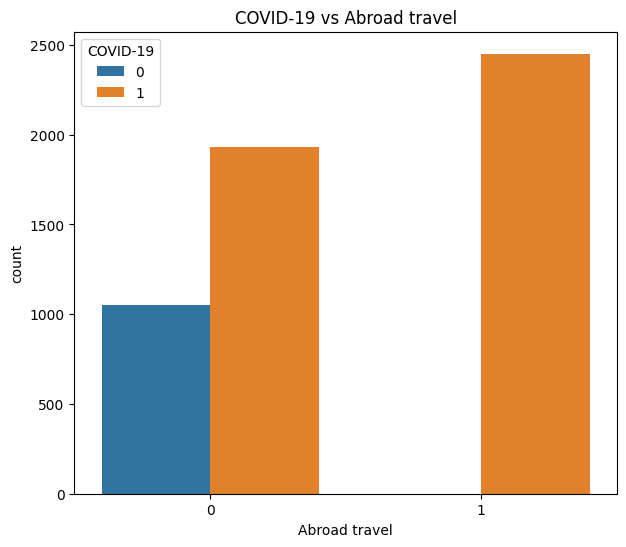

In [275]:
fig, ax = plt.subplots(figsize=(7, 6))

sns.countplot(x='Abroad travel', hue='COVID-19', data=df, ax=ax)
ax.set_title('COVID-19 vs Abroad travel')

plt.show()

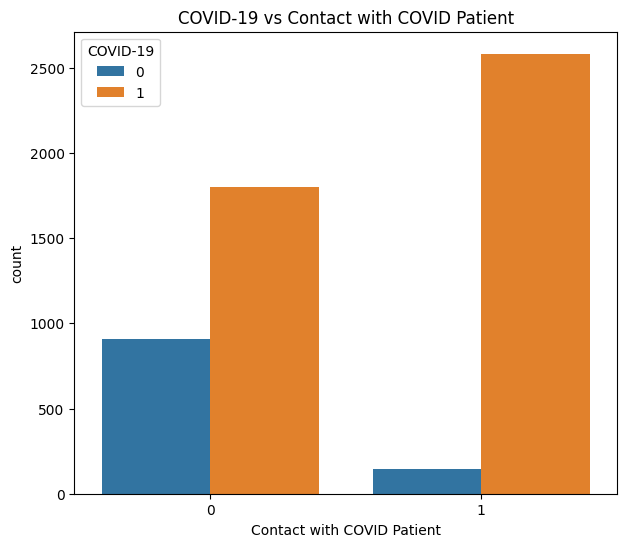

In [276]:
fig, ax = plt.subplots(figsize=(7, 6))

sns.countplot(x='Contact with COVID Patient', hue='COVID-19', data=df, ax=ax)
ax.set_title('COVID-19 vs Contact with COVID Patient')

plt.show()

Hypothesis 3.
People who have had contact with a COVID-positive patient or have been in exposed public places are more likely to develop symptoms of COVID-19 (e.g., fever, dry cough, fatigue).



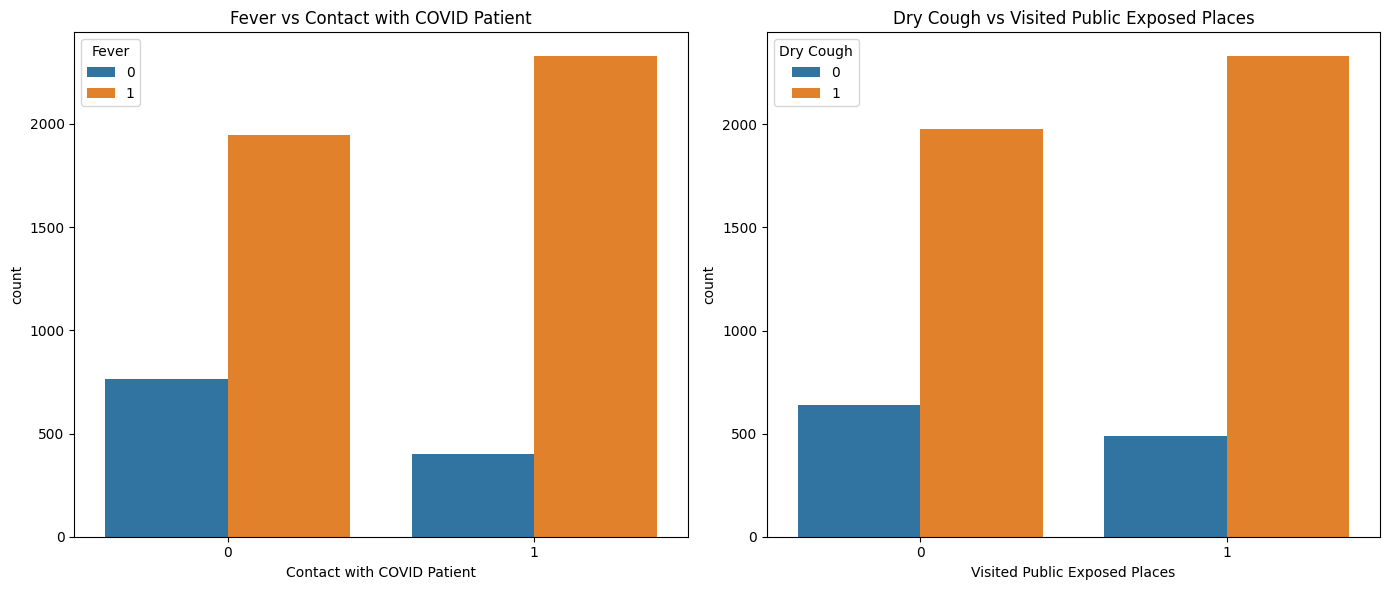

In [264]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Grafico per Contact with COVID Patient vs Fever
sns.countplot(x='Contact with COVID Patient', hue='Fever', data=df, ax=axes[0])
axes[0].set_title('Fever vs Contact with COVID Patient')

# Grafico per Visited Public Exposed Places vs Dry Cough
sns.countplot(x='Visited Public Exposed Places', hue='Dry Cough', data=df, ax=axes[1])
axes[1].set_title('Dry Cough vs Visited Public Exposed Places')

plt.tight_layout()
plt.show()

## ML model building and evaluation

In [306]:
x = df.drop(['COVID-19'], axis=1)  
y = df['COVID-19']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [307]:
def evaluate_models(x, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    
    models = {
        'Logistic Regression': LogisticRegression(),
        'SVM': SVC(),
        'Random Forest': RandomForestClassifier(),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'XGBoost': xgb.XGBClassifier()
    }
    
    performance_metrics = {}
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Store the results
        performance_metrics[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }
    
    performance_df = pd.DataFrame(performance_metrics).T
    return performance_df

x = df.drop(['COVID-19'], axis=1) 
y = df['COVID-19'] 

performance_df = evaluate_models(x, y)
print(performance_df)


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.972401   0.975501  0.990950  0.983165
SVM                  0.984361   0.994299  0.986425  0.990346
Random Forest        0.984361   0.994299  0.986425  0.990346
KNN                  0.971481   0.977604  0.987557  0.982555
Decision Tree        0.984361   0.994299  0.986425  0.990346
Gradient Boosting    0.981601   0.994279  0.983032  0.988623
XGBoost              0.984361   0.994299  0.986425  0.990346


SVM, Random Forest, Decision Tree are the best models in terms of Accuracy (0.984361), Precision (0.994299), Recall (0.986425) and F1 Score (0.990346).

## Fine-tuning

Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
               Accuracy  Precision    Recall  F1 Score
SVM            0.984361   0.994299  0.986425  0.990346
Random Forest  0.984361   0.994299  0.986425  0.990346
Decision Tree  0.984361   0.994299  0.986425  0.990346


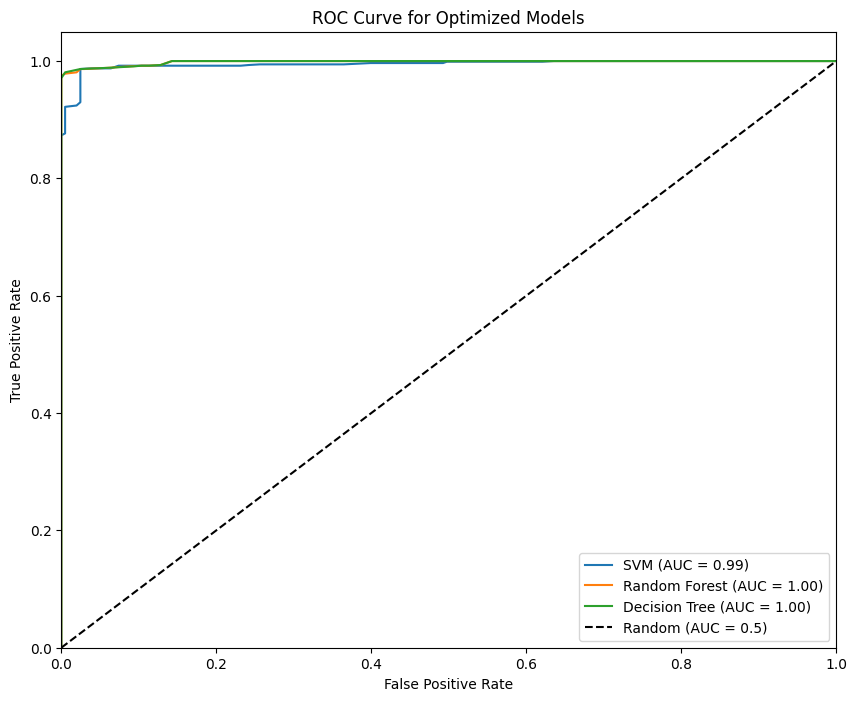

In [312]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot the ROC curve
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    # Calculate the ROC curve for each model
    for model_name, model in models.items():
        y_prob = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_prob)  # Calculate the ROC curve
        roc_auc = auc(fpr, tpr)  # Calculate the AUC
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Plot the diagonal line of random guess (AUC = 0.5)
    plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')  # Label for the X axis (False Positive Rate)
    plt.ylabel('True Positive Rate')   # Label for the Y axis (True Positive Rate)
    plt.title('ROC Curve for Optimized Models')  # Title of the plot
    plt.legend(loc='lower right')  # Position of the legend
    plt.show()  # Display the plot

# 1. Fine-tuning SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm = SVC(probability=True)  # Needed to calculate probabilities
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, n_jobs=-1, verbose=0)
grid_search_svm.fit(X_train, y_train)
print(f"Best parameters for SVM: {grid_search_svm.best_params_}")
svm_best = grid_search_svm.best_estimator_

# 2. Fine-tuning Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, verbose=0)
grid_search_rf.fit(X_train, y_train)
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
rf_best = grid_search_rf.best_estimator_

# 3. Fine-tuning Decision Tree
param_grid_dt = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, n_jobs=-1, verbose=0)
grid_search_dt.fit(X_train, y_train)
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")
dt_best = grid_search_dt.best_estimator_

# 4. Evaluate the optimized models
models = {
    'SVM': svm_best,
    'Random Forest': rf_best,
    'Decision Tree': dt_best
}

# Perform evaluation for each model
results = {}
for model_name, model in models.items():
    metrics = evaluate_model_metrics(model, X_test, y_test)
    results[model_name] = metrics

# Convert results to a DataFrame for comparison
df_results = pd.DataFrame(results).T
print(df_results)

# 5. Plot the ROC curve
plot_roc_curve(models, X_test, y_test)


In [316]:
joblib.dump(rf_best, 'model_rf.pkl')


['model_rf.pkl']

In [317]:
print(x.shape)  # Questo ti dirà quante righe (campioni) e colonne (feature) ci sono


(5434, 18)
